In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import random 

# from google.colab import drive
# drive.mount('/content/drive')
with open("authors.txt") as f:
  lines = f.readlines()




auth_graph = {}
rewired_graph = {}
random_graph = {}






# New Section

Generating author graph 

In [2]:
auth_graph = {}
num_papers = len(lines)
for i in range(num_papers):
  line = lines[i].strip().split(", ")
  #print(line)
  # authors at index 3, strip whitespace from it, then split using ' &' 
   #print(line)
  # some lines have \n mid sentence, so we handle those here
  if(len(line) != 5):
    line.extend(lines[i+1])
    i += 1
  authors = line[3].strip().split(" & ")
  #print(authors)
  for author in authors:
    if author not in auth_graph:
      auth_graph[author] = {}
    
    for coauth in authors:
        if coauth not in auth_graph:
            auth_graph[coauth] = {}
        if(coauth !=  author and (coauth not in auth_graph[author])):
            auth_graph[author][coauth] = 1
            auth_graph[coauth][author] = 1
        if(coauth in auth_graph[author]):
            auth_graph[author][coauth] += 1
            auth_graph[coauth][author] += 1

for key in auth_graph:
  print(key + ": " ,auth_graph[key])
      

Horne:  {'Horowitz': 9, 'Moore': 3}
Horowitz:  {'Horne': 9, 'Brill': 3, 'Kastor': 3, 'Traschen': 3, 'Welch': 3, 'Dowker': 7, 'Gauntlett': 7, 'Giddings': 3, 'Tseytlin': 5, 'Hawking': 3, 'Ross': 7, 'Marolf': 9, 'Gibbons': 5, 'Sen': 3, 'Tada': 3, 'Maldacena': 3, 'Strominger': 3, 'Polchinski': 5, 'Yang': 3, 'Martinec': 3, 'Myers': 3, 'Hubeny': 3, 'Low': 3, 'Zee': 3}
Mikovic:  {'Manojlovic': 3, 'Navarro': 3, 'Sazdovic': 3, 'Radovanovic': 7, 'Cederwall': 3, 'Gussich': 3, 'Nilsson': 3, 'Westerberg': 3, 'Cruz': 5, 'Navarro-Salas': 5, 'Buric': 3}
Huitu:  {'Nemeschansky': 3, 'Kobayashi': 3}
Nemeschansky:  {'Huitu': 3, 'Warner': 23, 'Maassarani': 3, 'LeClair': 5, 'Bershadsky': 5, 'Lerche': 5, 'Minahan': 15, 'Vafa': 3, 'Altendorfer': 3, 'Bagger': 3}
Witten:  {'Zwiebach': 3, 'Nappi': 3, 'Li': 3, 'Kachru': 3, 'Vaz': 15, 'Silverstein': 5, 'Giveon': 3, 'Seiberg': 11, 'Vafa': 9, 'Donagi': 5, 'Polchinski': 5, 'Horava': 5, 'Argyres': 3, 'Plesser': 3, 'Duff': 3, 'Minasian': 3, 'Berkooz': 3, 'Leigh': 3, 'S

In [3]:
import networkx as nx

G = nx.Graph()

for node in auth_graph:
  G.add_node(node)
  for coauth in auth_graph[node]:
    G.add_edge(node, coauth, weight = auth_graph[node][coauth])

In [4]:
import matplotlib.pyplot as plt

In [5]:
fig = plt.figure()
fig.set_size_inches(16, 10)

<Figure size 1600x1000 with 0 Axes>

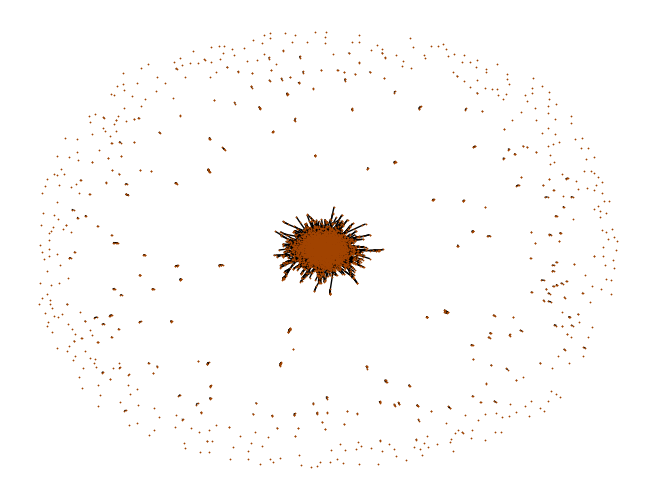

In [6]:
nx.draw(G, node_size = 1, node_color = '#a14300', linewidths=0.2, edge_cmap = 'viridis')

In [7]:
nx.write_gexf(G, "authors.gexf")

Rewired network

In [8]:
rewired_graph = {}
author_keys = list(auth_graph.keys())

for author in auth_graph:
    if author not in rewired_graph:
        rewired_graph[author] = {}
    original_coauth = list(auth_graph[author])
    for _ in range(len(original_coauth)):
        new_node = random.choice(author_keys)
    # find random node that is not the same (no cycles) and is not alrdy connected 
        while(new_node == author or new_node in original_coauth):
              new_node = random.choice(author_keys)
        rewired_graph[author][new_node] = 1
        if new_node not in rewired_graph:
            rewired_graph[new_node] = {}
        rewired_graph[new_node][author] = 1
        
        
    


In [9]:
R = nx.Graph()

for node in rewired_graph:
    R.add_node(node)
    for coauth in rewired_graph[node]:
        R.add_edge(node, coauth, weight = rewired_graph[node][coauth])

In [10]:
ER = nx.gnm_random_graph(len(G.nodes), len(G.edges), seed = 198)

In [11]:
G.nodes

NodeView(('Horne', 'Horowitz', 'Moore', 'Brill', 'Kastor', 'Traschen', 'Welch', 'Dowker', 'Gauntlett', 'Giddings', 'Tseytlin', 'Hawking', 'Ross', 'Marolf', 'Gibbons', 'Sen', 'Tada', 'Maldacena', 'Strominger', 'Polchinski', 'Yang', 'Martinec', 'Myers', 'Hubeny', 'Low', 'Zee', 'Mikovic', 'Manojlovic', 'Navarro', 'Sazdovic', 'Radovanovic', 'Cederwall', 'Gussich', 'Nilsson', 'Westerberg', 'Cruz', 'Navarro-Salas', 'Buric', 'Huitu', 'Nemeschansky', 'Kobayashi', 'Warner', 'Maassarani', 'LeClair', 'Bershadsky', 'Lerche', 'Minahan', 'Vafa', 'Altendorfer', 'Bagger', 'Witten', 'Zwiebach', 'Nappi', 'Li', 'Kachru', 'Vaz', 'Silverstein', 'Giveon', 'Seiberg', 'Donagi', 'Horava', 'Argyres', 'Plesser', 'Duff', 'Minasian', 'Berkooz', 'Leigh', 'Schwarz', 'Sethi', 'Grassi', 'Hanany', 'Barve', 'Singh', 'Klebanov', 'Graham', 'Gukov', 'Gates', 'Karp', 'Esposito', 'Intriligator', 'Fendley', 'Cecotti', 'Shenker', 'Pouliot', 'Strassler', 'Elitzur', 'Forge', 'Rabinovici', 'Thomas', 'Morrison', 'Sadov', 'Aharony'

A) degree distribution 

In [12]:
degree_freq_auth = nx.degree_histogram(G)
degrees_auth = range(len(degree_freq_auth))
degree_freq_rewired = nx.degree_histogram(R)
degrees_rewired = range(len(degree_freq_rewired))
degree_freq_random = nx.degree_histogram(ER)
degrees_random = range(len(degree_freq_random))

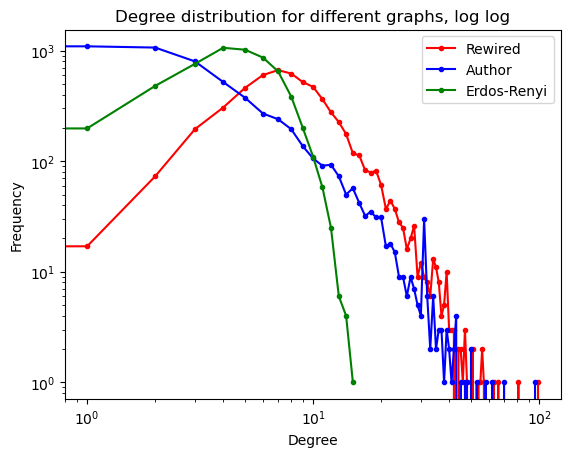

In [13]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 10)
ax.loglog(degrees_rewired, degree_freq_rewired, 'r.-', label='Rewired')
ax.loglog(degrees_auth, degree_freq_auth, 'b.-', label = 'Author')
ax.loglog(degrees_random, degree_freq_random, 'g.-', label ='Erdos-Renyi')
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
leg = ax.legend()
plt.title('Degree distribution for different graphs, log log');


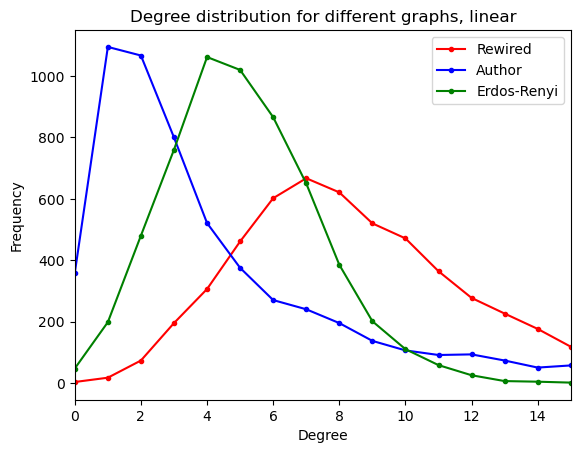

In [14]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 10)
ax.plot(degrees_rewired, degree_freq_rewired, 'r.-', label='Rewired')
ax.plot(degrees_auth, degree_freq_auth, 'b.-', label = 'Author')
ax.plot(degrees_random, degree_freq_random, 'g.-', label ='Erdos-Renyi')
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
leg = ax.legend()
plt.xlim([0,15])
plt.title('Degree distribution for different graphs, linear');

# B) Clustering coefficient 

In [15]:
def calc_cc_per_node(Graph):
  ans = {}
  
  for node in Graph.nodes():
    neighbors = [n for n in nx.neighbors(Graph, node)]
    n_neighbors = len(neighbors)
    n_edges = 0;
    cc = 0
    if n_neighbors > 1:
      for n1 in neighbors:
        for n2 in neighbors:
          if Graph.has_edge(n1, n2):
            n_edges += 1
      n_edges/=2
      cc = n_edges/(0.5*n_neighbors*(n_neighbors-1))
    ans[node] = cc
  return ans

In [16]:
def calc_cc(Graph):
  ans = {}
  for node in Graph.nodes():
    neighbors = [n for n in nx.neighbors(Graph, node)]
    n_neighbors = len(neighbors)
    n_edges = 0;
    cc = 0
    if n_neighbors > 1:
      for n1 in neighbors:
        for n2 in neighbors:
          if Graph.has_edge(n1, n2):
            n_edges += 1
      n_edges/=2
      cc = n_edges/(0.5*n_neighbors*(n_neighbors-1))
    if Graph.degree[node] not in ans:
        ans[Graph.degree[node]] = []
    ans[Graph.degree[node]].append(cc)
  for key in ans:
     ans[key] = sum(ans[key])/len(ans[key])
  return ans

# avg coefficient per degree

In [17]:
cc_auth = calc_cc(G)
cc_rewired = calc_cc(R)
cc_random = calc_cc(ER)

In [18]:
cc_auth = {k: v for k, v in sorted(cc_auth.items(), key=lambda item: item[1])}
cc_rewired = {k: v for k, v in sorted(cc_rewired.items(), key=lambda item: item[1])}
cc_random = {k: v for k, v in sorted(cc_random.items(), key=lambda item: item[1])}


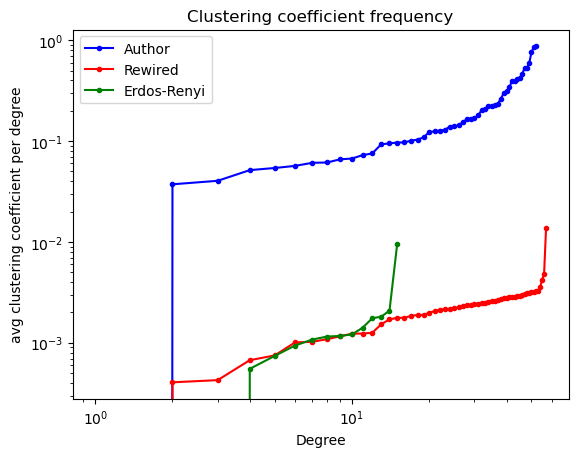

In [19]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 10)

ax.loglog(range(len(cc_auth)), cc_auth.values(), 'b.-', label='Author')
ax.loglog(range(len(cc_rewired)), cc_rewired.values(), 'r.-', label = 'Rewired')
ax.loglog(range(len(cc_random)), cc_random.values(), 'g.-', label ='Erdos-Renyi')

leg = ax.legend()
ax.set_xlabel('Degree')
ax.set_ylabel('avg clustering coefficient per degree')
plt.title('Clustering coefficient frequency');
plt.show()

# coefficient per degree for each node

In [20]:
cc_auth_node = calc_cc_per_node(G)
cc_rewired_node = calc_cc_per_node(R)
cc_random_node = calc_cc_per_node(ER)

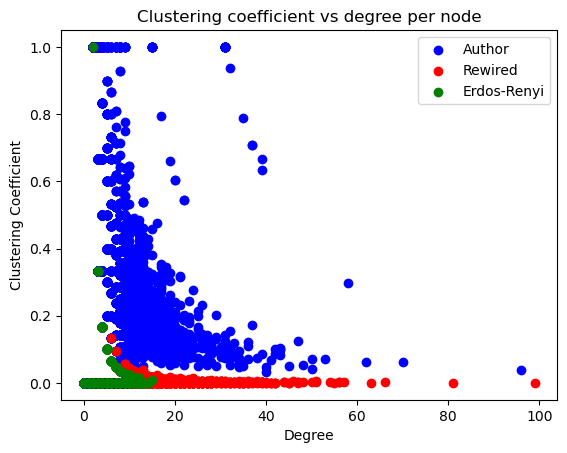

In [21]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 10)
degree_auth_n = [G.degree[node] for node in cc_auth_node]
degree_rewired_n = [R.degree[node] for node in cc_rewired_node]
degree_random_n = [ER.degree[node] for node in cc_random_node]
ax.scatter(degree_auth_n, cc_auth_node.values(), c='b', label='Author')
ax.scatter(degree_rewired_n, cc_rewired_node.values(), c='r', label = 'Rewired')
ax.scatter(degree_random_n, cc_random_node.values(), c = 'g', label ='Erdos-Renyi')

leg = ax.legend()
ax.set_xlabel('Degree')
ax.set_ylabel('Clustering Coefficient')
plt.title('Clustering coefficient vs degree per node');
plt.show()

In [22]:
avg_cc_auth = nx.average_clustering(G)
avg_cc_rewired = nx.average_clustering(R)
avg_cc_random = nx.average_clustering(ER)

In [23]:
print(f"avg clustering coefficient of author graph's components: {avg_cc_auth:.4f}\n")
print(f"avg clustering coefficient of rewired graph's components: {avg_cc_rewired:.4f}\n")
print(f"avg clustering coefficient of random graph's components: {avg_cc_random:.4f}\n")

avg clustering coefficient of author graph's components: 0.4352

avg clustering coefficient of rewired graph's components: 0.0029

avg clustering coefficient of random graph's components: 0.0012



# comments:


# C) Shortest paths frequency against length 

In [24]:
paths_auth = nx.all_pairs_shortest_path_length(G)
paths_rewired = nx.all_pairs_shortest_path_length(R)
paths_random = nx.all_pairs_shortest_path_length(ER)

In [25]:
import collections

def get_freq_short_paths(paths):
    path_len = []
    for path in paths:
        for key in path[1]:
            if(path[1][key] != 0):
                path_len.append(path[1][key])
        break

    counter = collections.Counter(path_len)
    return counter

In [26]:
count_auth = get_freq_short_paths(paths_auth)
count_rewired = get_freq_short_paths(paths_rewired)
count_random = get_freq_short_paths(paths_random)

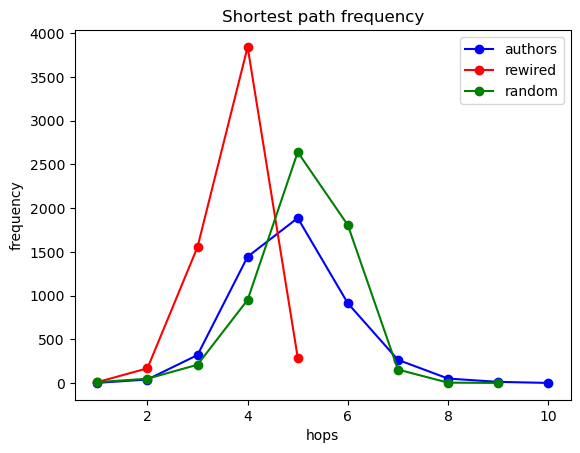

In [27]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 8)
ax.plot(count_auth.keys(), count_auth.values(), 'bo-', label='authors')
ax.plot(count_rewired.keys(), count_rewired.values(), 'ro-', label='rewired')
ax.plot(count_random.keys(), count_random.values(), 'go-', label='random')
ax.set_xlabel('hops')
ax.set_ylabel('frequency')
leg = ax.legend()
plt.title('Shortest path frequency');

In [28]:
auth_diameter = nx.diameter(G)
rewired_diameter = nx.diameter(R)
random_diameter = nx.diameter(ER)

NetworkXError: Found infinite path length because the graph is not connected

some parts for all the graphs are not connected, so I took the connected components and found the diameter of each one of them

In [29]:
connect_comp = nx.connected_components(G)

In [30]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [31]:
def diameter_of_connected(graph):
    diam_list = []
    S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]
    for comp in S:
        diam_list.append(nx.diameter(comp))
    return diam_list

In [32]:
diam_auth = diameter_of_connected(G)
diam_rewired = diameter_of_connected(R)
diam_random = diameter_of_connected(ER)

In [33]:
print(f"max diameter of author graph's components: {max(diam_auth)}\n")
print(f"max diameter of rewired graph's components: {max(diam_rewired)}\n")
print(f"max diameter of random graph's components: {max(diam_random)}\n")

max diameter of author graph's components: 14

max diameter of rewired graph's components: 7

max diameter of random graph's components: 11



# D) Connected components

In [34]:
def get_components(graph):
    return [graph.subgraph(c).copy() for c in nx.connected_components(graph)]

    

In [35]:
auth_comps = get_components(G)
rewired_comps = get_components(R)
random_comps = get_components(ER)

In [36]:
auth_sizes = [S.number_of_nodes() for S in auth_comps]
rewired_sizes = [S.number_of_nodes() for S in rewired_comps]
random_sizes = [S.number_of_nodes() for S in random_comps]

In [37]:
import collections as c
auth_freq = c.Counter(auth_sizes)
rewired_freq = c.Counter(rewired_sizes)
random_freq = c.Counter(random_sizes)

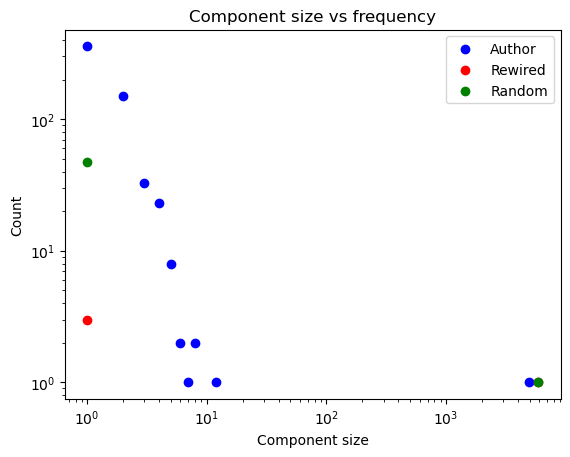

In [38]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 10)

ax.scatter(auth_freq.keys(), auth_freq.values(), c = 'b', label='Author')
ax.scatter(rewired_freq.keys(), rewired_freq.values(), c='r', label='Rewired')
ax.scatter(random_freq.keys(), random_freq.values(), c = 'g', label='Random')


leg = ax.legend()
ax.set_xlabel('Component size')
ax.set_xscale('log')
ax.set_ylabel('Count')
ax.set_yscale('log')
plt.title('Component size vs frequency');
plt.show()

# comments: 


# E) normalized betweeness centrality

We will get betweeness centrality in largest connected component

In [43]:
auth_comps = get_components(G)
rewired_comps = get_components(R)
random_comps = get_components(ER)

Largest connected component at index 0

In [50]:
auth_cent = nx.betweenness_centrality(auth_comps[0], normalized=True, seed = 10)
rewired_cent = nx.betweenness_centrality(rewired_comps[0], normalized=True, seed=10)
random_cent = nx.betweenness_centrality(random_comps[0], normalized=True, seed=10)

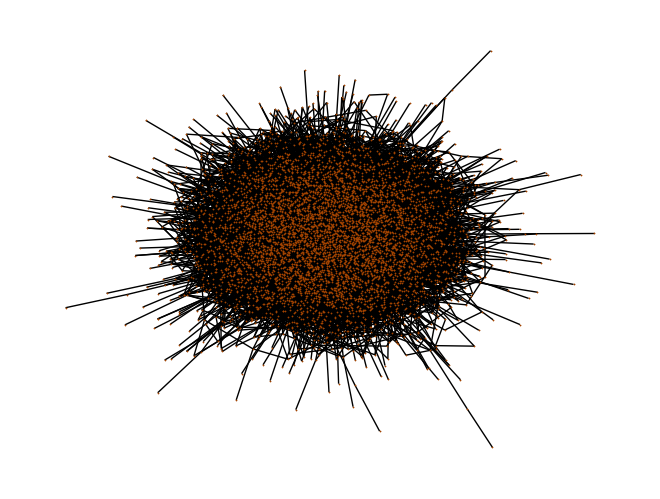

In [48]:
nx.draw(random_comps[0], node_size = 1, node_color = '#a14300', linewidths=0.2, edge_cmap = 'viridis')

In [51]:
def bin_data(data, step = 0.01):
    visited = {}
    curr = 0.00
    ans = {}
    while(len(visited) < len(data)):
        count = 0
        for key in data:
            if( curr <= data[key] < curr+step):
                if(key not in visited):
                    visited[key] = 1
                    count +=1
                else:
                    continue
        ans[round(curr, 3)] = count
        count = 0
        curr += step
    return ans
                
        

In [52]:
auth_binned = bin_data(auth_cent, step = 0.001)
rewired_binned = bin_data(rewired_cent, step = 0.001)
random_binned = bin_data(random_cent, step = 0.001)

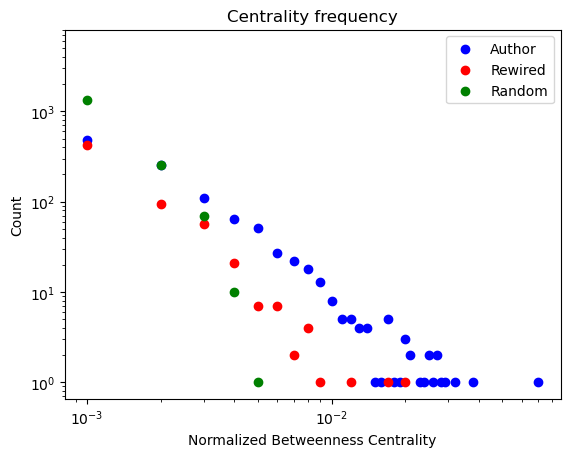

In [53]:
fig, ax = plt.subplots()

fig.set_fsize_inches=(16, 10)

ax.scatter(auth_binned.keys(), auth_binned.values(), c = 'b', label='Author')
ax.scatter(rewired_binned.keys(), rewired_binned.values(), c='r', label='Rewired')
ax.scatter(random_binned.keys(), random_binned.values(), c = 'g', label='Random')


leg = ax.legend()
ax.set_xlabel('Normalized Betweenness Centrality')
ax.set_xscale('log')
ax.set_ylabel('Count')
ax.set_yscale('log')
plt.title('Centrality frequency');
plt.show()

# Comments:

# F) Girvan-Newman

Use girvan-Newman on largest connected component

In [74]:
def update_deg(A, nodes):
    deg = {}
    n = len(nodes)
    weightsums = A.sum(axis=1)
    i=0
    for node in list(nodes()):
        deg[node] = weightsums[i, 0]
        i+= 1
    return deg

def findmod(G, deg, m_):
    new_Adj = nx.adj_matrix(G)
    new_deg = update_deg(new_Adj, G.nodes())
    
    # compute Q
    comps = nx.connected_comps(G)
    print("# of communities in G: {}".format(len(comps)))
    Q = 0
    for comp in comps:
        edgeInC = 0
        randomEdges = 0
        for u in comp:
            edgeInC = new_deg[u]
            randomEdges = deg[u] #prop of random edge
        Q+= (float(edgeInC)-float(randomEdges**2)/float(2*m_))
    Q /= float(2*m_)
    return Q

def findCmty(G):
    s_ncomps = nx.number_connected_components(G)
    ncomp = s_ncomps
    while ncomp <= s_ncomps:
        edge_bw = nx.edge_betweenness_centrality(G)
        # get max
        max_ = max(edge_bw.values())
        for k, v in edge_bw.items():
            if(float(v) == max_):
                G.remove_edge(k[0], k[1])
        ncomp = nx.number_connected_components(G)
        
def girvan_newman(graph):
    # copy graph
    G = graph.copy()
    #init values 
    Q_best = 0.0
    Q = 0.0
    m_ = 0.0 # sum of weights
    A = nx.adj_matrix(G)
    n = G.number_of_nodes()
    # find total number of edges 
    for i in range(0, n):
        for j in range(0, n):
            m_ += A[i, j]
    m_ = m_/2.0
    
    # find degree for each node
    deg = update_deg(A, G.nodes())
     
    #perform girvan-newman method till edges == 0
    while True:
        #find new cmty
        findCmty(G)
        #get new modularity 
        Q = findmod(G, deg, m_)
        print("Modularity of decomposed Graph: {}".format(Q))
        if Q > Q_best:
            Q_best = Q
            Bestcomps = list(nx.connected_components(G))
            print("Identified components: {}".format(Bestcomps))
        if G.number_of_edges() == 0:
            break
    if Q_best > 0.0:
        print("Max Modularity Found: {}, number of communities: {}".format(Q_best, len(Bestcomps)))
        print("Graph communities: {}".format(Bestcomps))
    else:
        print("Max modularity: {}".format(Q_best))
    return Q_best, Bestcomps

In [ ]:
auth_q, auth_gn = girvan_newman(auth_comps[0])
rewired_q, rewired_gn = girvan_newman(rewired_comps[0])
random_q, random_gn = girvan_newman(random_comps[0])

In [ ]:


auth_comm = []
rewired_comm = []
random_comm = []
for comm in next(auth_gn):
    auth_comm.append(list(comm))
for comm in next(rewired_gn):
    rewired_comm.append(list(comm))
for comm in next(random_gn):
    random_comm.append(list(comm))


0

# comments:

# G) modularity optimization

Mod optimization = argmax (s^t*u_i)^2 * B_i
u_i -> eigenvector
B_i -> eigenvalue
s_i -> {0, 1} depending on value in eigenvector
B -> mod matrix:
    B_ij = Aij - kikj/2m
Alg:
    - find leading eigenvector in mod matrix B
    - divide nodes into two comms according to sign in leadsing eigenvector
    - Repeat recursively on extracted communities until all comms are indivisible:
        - when all elements of leading eigenvector have same sign
        - any splitting doesnt cause mod value Q to increase
        

In [ ]:
from numpy import linalg as LA

def opt_mod(graph):
    # copy graph
    G = nx.copy(graph)
    #compute modularity matrix
    B = nx.modularity_matrix(G)

# comments:

# H) spectral clustering

In [ ]:
import sklearn
from sklearn.cluster import SpectralClustering


auth_mat = nx.to_numpy_matrix(auth_comps[0])
rewired_mat = nx.to_numpy_matrix(rewired_comps[0])
random_mat = nx.to_numpy_matrix(random_comps[0])

auth_sc = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=10,n_clusters=5).fit_predict(auth_mat)
rewired_sc = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=10,n_clusters=5).fit_predict(rewired_mat)
random_sc = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=10,n_clusters=5).fit_predict(random_mat)




# comments:

# I) comparison